In [83]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
digits = load_digits()
X, y = digits.data, digits.target

In [61]:
tree = DecisionTreeClassifier()
scores = cross_val_score(tree, X, y, cv=10, n_jobs=4)
with open('ans1.txt', 'w') as f: f.write(f'{scores.mean()}')

In [62]:
bag = BaggingClassifier(n_estimators=100)
scores = cross_val_score(bag, X, y, cv=10, n_jobs=4)
with open('ans2.txt', 'w') as f: f.write(f'{scores.mean()}')

In [63]:
bag = BaggingClassifier(n_estimators=100, max_features=int(X.shape[1]**0.5))
scores = cross_val_score(bag, X, y, cv=10, n_jobs=4)
with open('ans3.txt', 'w') as f: f.write(f'{scores.mean()}')

In [64]:
tree = DecisionTreeClassifier(max_features=int(X.shape[1]**0.5))
bag = BaggingClassifier(tree, n_estimators=100)
scores = cross_val_score(bag, X, y, cv=10, n_jobs=4)
with open('ans4.txt', 'w') as f: f.write(f'{scores.mean()}')

In [81]:
forest = RandomForestClassifier(n_estimators=5, max_depth=10, max_features=8)
scores = cross_val_score(forest, X, y, cv=10, n_jobs=4)
scores.mean()

0.8753724394785847

CPU times: user 622 ms, sys: 173 ms, total: 795 ms
Wall time: 13.2 s


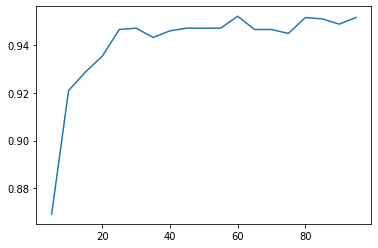

In [89]:
%%time
scores = []
n_estimators = range(5,100,5)
for n in n_estimators:
    forest = RandomForestClassifier(n_estimators=n)
    scores.append(cross_val_score(forest, X, y, cv=10, n_jobs=4).mean())
plt.plot(n_estimators, scores)

CPU times: user 766 ms, sys: 305 ms, total: 1.07 s
Wall time: 30.2 s


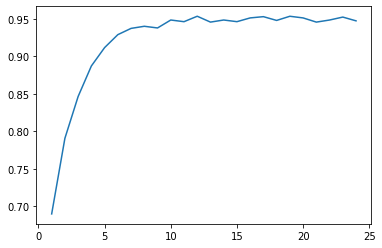

In [91]:
%%time
scores = []
max_depth = range(1,25)
for d in max_depth:
    forest = RandomForestClassifier(max_depth=d)
    scores.append(cross_val_score(forest, X, y, cv=10, n_jobs=4).mean())
plt.plot(max_depth, scores)

CPU times: user 490 ms, sys: 164 ms, total: 654 ms
Wall time: 34.5 s


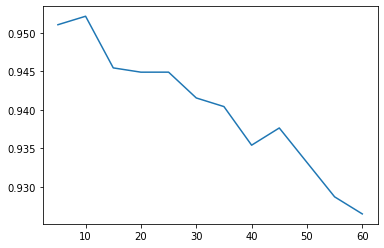

In [93]:
%%time
scores = []
max_features = range(5, X.shape[1], 5)
for f in max_features:
    forest = RandomForestClassifier(max_features=f)
    scores.append(cross_val_score(forest, X, y, cv=10, n_jobs=4).mean())
plt.plot(max_features, scores)

In [94]:
with open('ans5.txt', 'w') as f: f.write('2 3 4 7')